In [226]:
import numpy as np
import pickle
import matplotlib.pyplot as plt #For plotting
np.random.seed(0) #For repeatability of the experiment
from sklearn import cross_validation
from sklearn.model_selection import KFold

In [9]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))

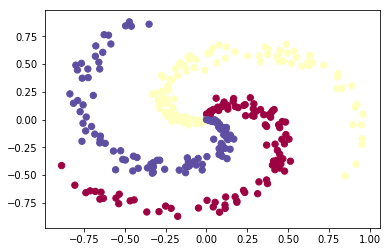

In [12]:
#Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# question 4 (2)

In [219]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [220]:
print(ytrain[:10])

[1 0 0 0 2 2 0 0 2 1]


# question 4(3)

In [1]:
np.random.seed(123)
D = xtrain.shape[1] #Number of features
K = max(ytrain)+1 #Number of classes assuming class index starts from 0
print(D)
print(K)
# Start with an initialize parameters randomly
W = 0.05 * np.random.randn(D,K)
b = 0.01 * np.random.randn(1,K)

W_cv=W
b_cv=b


NameError: name 'np' is not defined

In [316]:
# Initial values from hyperparameter
reg = 1e-2 # regularization strength
#For simplicity we will take the batch size to be the same as number of examples
num_examples = xtrain.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

In [317]:
def grad_desc_new(xtrain,ytrain,W,b,reg,num_examples,step_size,xtest,ytest):
    total_loss=[]
    total_item=[]
    for i in range(2000):
  
    # evaluate class scores, [N x K]
        scores = np.dot(xtrain, W) + b 
      
    # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
   
    # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytrain])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        if i % 50 == 0:
            print("iteration %d: loss %f" % (i, loss))
        total_loss.append(loss)
        total_item.append(i)    
  
    # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytrain] -= 1
        dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
        dW = np.dot(xtrain.T, dscores)
     
        dW += reg*W # regularization gradient
  
    # perform a parameter update
        W += -step_size * dW
    
    #Plot the loss function
    plt.plot(total_item,total_loss,color='orange')
    plt.show()
    
    #Check the performance on the test data
    scores = np.dot(xtest, W) + b
    predicted_class = np.argmax(scores, axis=1)
    Accuracy=np.mean(predicted_class == ytest)
     
    return W,b,Accuracy

iteration 0: loss 1.099007
iteration 50: loss 1.085540
iteration 100: loss 1.072911
iteration 150: loss 1.061064
iteration 200: loss 1.049947
iteration 250: loss 1.039511
iteration 300: loss 1.029712
iteration 350: loss 1.020507
iteration 400: loss 1.011856
iteration 450: loss 1.003723
iteration 500: loss 0.996073
iteration 550: loss 0.988874
iteration 600: loss 0.982097
iteration 650: loss 0.975714
iteration 700: loss 0.969699
iteration 750: loss 0.964030
iteration 800: loss 0.958682
iteration 850: loss 0.953636
iteration 900: loss 0.948873
iteration 950: loss 0.944375
iteration 1000: loss 0.940125
iteration 1050: loss 0.936108
iteration 1100: loss 0.932310
iteration 1150: loss 0.928716
iteration 1200: loss 0.925315
iteration 1250: loss 0.922095
iteration 1300: loss 0.919045
iteration 1350: loss 0.916155
iteration 1400: loss 0.913416
iteration 1450: loss 0.910818
iteration 1500: loss 0.908354
iteration 1550: loss 0.906016
iteration 1600: loss 0.903796
iteration 1650: loss 0.901689
ite

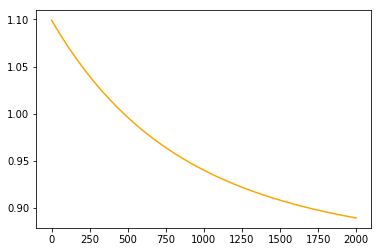

Accuracy: 0.53


In [314]:
W,b,Test_Accuracy = grad_desc_new(xtrain,ytrain,W,b,reg,num_examples,step_size,xtest,ytest)
print('Accuracy: %.2f' % Test_Accuracy)

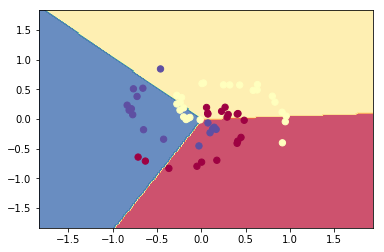

In [225]:
def post_training_plot(xtest,W,b):
    h = 0.02
    x_min, x_max = xtest[:, 0].min() - 1, xtest[:, 0].max() + 1
    y_min, y_max = xtest[:, 1].min() - 1, xtest[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    #fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(xtest[:, 0], xtest[:, 1], c=ytest, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    #fig.savefig('spiral_linear.png')

post_training_plot(xtest,W,b)  
    

iteration 0: loss 1.094055
iteration 50: loss 0.942800
iteration 100: loss 0.856325
iteration 150: loss 0.803282
iteration 200: loss 0.768505
iteration 250: loss 0.744447
iteration 300: loss 0.727092
iteration 350: loss 0.714151
iteration 400: loss 0.704245
iteration 450: loss 0.696498
iteration 500: loss 0.690333
iteration 550: loss 0.685353
iteration 600: loss 0.681280
iteration 650: loss 0.677914
iteration 700: loss 0.675107
iteration 750: loss 0.672747
iteration 800: loss 0.670749
iteration 850: loss 0.669047
iteration 900: loss 0.667591
iteration 950: loss 0.666337
iteration 1000: loss 0.665254
iteration 1050: loss 0.664315
iteration 1100: loss 0.663497
iteration 1150: loss 0.662783
iteration 1200: loss 0.662158
iteration 1250: loss 0.661609
iteration 1300: loss 0.661126
iteration 1350: loss 0.660701
iteration 1400: loss 0.660324
iteration 1450: loss 0.659991
iteration 1500: loss 0.659696
iteration 1550: loss 0.659434
iteration 1600: loss 0.659200
iteration 1650: loss 0.658992
ite

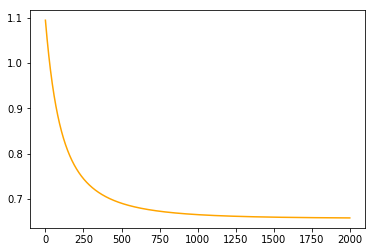

iteration 0: loss 1.105397
iteration 50: loss 1.007897
iteration 100: loss 0.942629
iteration 150: loss 0.899635
iteration 200: loss 0.871143
iteration 250: loss 0.851838
iteration 300: loss 0.838330
iteration 350: loss 0.828528
iteration 400: loss 0.821155
iteration 450: loss 0.815432
iteration 500: loss 0.810874
iteration 550: loss 0.807173
iteration 600: loss 0.804125
iteration 650: loss 0.801592
iteration 700: loss 0.799474
iteration 750: loss 0.797697
iteration 800: loss 0.796205
iteration 850: loss 0.794950
iteration 900: loss 0.793896
iteration 950: loss 0.793012
iteration 1000: loss 0.792271
iteration 1050: loss 0.791652
iteration 1100: loss 0.791135
iteration 1150: loss 0.790704
iteration 1200: loss 0.790346
iteration 1250: loss 0.790049
iteration 1300: loss 0.789803
iteration 1350: loss 0.789599
iteration 1400: loss 0.789431
iteration 1450: loss 0.789292
iteration 1500: loss 0.789177
iteration 1550: loss 0.789083
iteration 1600: loss 0.789006
iteration 1650: loss 0.788943
ite

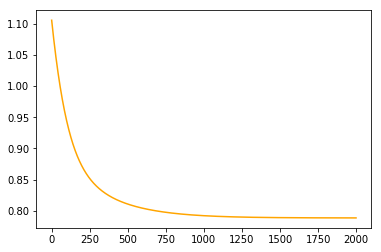

iteration 0: loss 0.845012
iteration 50: loss 0.798471
iteration 100: loss 0.767195
iteration 150: loss 0.745402
iteration 200: loss 0.729721
iteration 250: loss 0.718126
iteration 300: loss 0.709351
iteration 350: loss 0.702582
iteration 400: loss 0.697276
iteration 450: loss 0.693060
iteration 500: loss 0.689672
iteration 550: loss 0.686922
iteration 600: loss 0.684671
iteration 650: loss 0.682815
iteration 700: loss 0.681272
iteration 750: loss 0.679983
iteration 800: loss 0.678900
iteration 850: loss 0.677984
iteration 900: loss 0.677207
iteration 950: loss 0.676545
iteration 1000: loss 0.675978
iteration 1050: loss 0.675491
iteration 1100: loss 0.675071
iteration 1150: loss 0.674708
iteration 1200: loss 0.674393
iteration 1250: loss 0.674119
iteration 1300: loss 0.673880
iteration 1350: loss 0.673672
iteration 1400: loss 0.673489
iteration 1450: loss 0.673329
iteration 1500: loss 0.673189
iteration 1550: loss 0.673065
iteration 1600: loss 0.672956
iteration 1650: loss 0.672859
ite

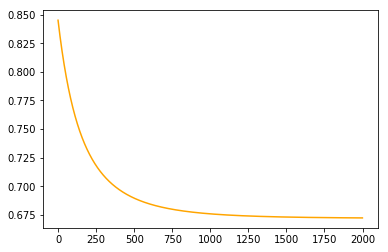

[0.24666666666666667]
iteration 0: loss 1.161653
iteration 50: loss 1.038329
iteration 100: loss 0.954334
iteration 150: loss 0.896409
iteration 200: loss 0.855912
iteration 250: loss 0.827313
iteration 300: loss 0.807015
iteration 350: loss 0.792597
iteration 400: loss 0.782379
iteration 450: loss 0.775167
iteration 500: loss 0.770103
iteration 550: loss 0.766564
iteration 600: loss 0.764103
iteration 650: loss 0.762398
iteration 700: loss 0.761221
iteration 750: loss 0.760410
iteration 800: loss 0.759853
iteration 850: loss 0.759470
iteration 900: loss 0.759207
iteration 950: loss 0.759026
iteration 1000: loss 0.758901
iteration 1050: loss 0.758815
iteration 1100: loss 0.758756
iteration 1150: loss 0.758715
iteration 1200: loss 0.758687
iteration 1250: loss 0.758667
iteration 1300: loss 0.758653
iteration 1350: loss 0.758643
iteration 1400: loss 0.758636
iteration 1450: loss 0.758632
iteration 1500: loss 0.758628
iteration 1550: loss 0.758626
iteration 1600: loss 0.758624
iteration 1

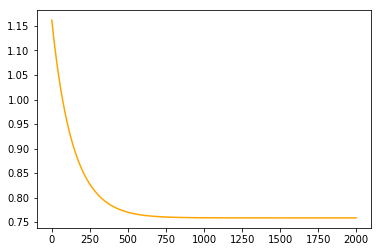

iteration 0: loss 1.048646
iteration 50: loss 0.968207
iteration 100: loss 0.922373
iteration 150: loss 0.895710
iteration 200: loss 0.879606
iteration 250: loss 0.869482
iteration 300: loss 0.862893
iteration 350: loss 0.858488
iteration 400: loss 0.855486
iteration 450: loss 0.853415
iteration 500: loss 0.851973
iteration 550: loss 0.850965
iteration 600: loss 0.850258
iteration 650: loss 0.849762
iteration 700: loss 0.849413
iteration 750: loss 0.849168
iteration 800: loss 0.848995
iteration 850: loss 0.848874
iteration 900: loss 0.848789
iteration 950: loss 0.848729
iteration 1000: loss 0.848687
iteration 1050: loss 0.848657
iteration 1100: loss 0.848637
iteration 1150: loss 0.848622
iteration 1200: loss 0.848612
iteration 1250: loss 0.848605
iteration 1300: loss 0.848600
iteration 1350: loss 0.848596
iteration 1400: loss 0.848594
iteration 1450: loss 0.848592
iteration 1500: loss 0.848591
iteration 1550: loss 0.848590
iteration 1600: loss 0.848589
iteration 1650: loss 0.848589
ite

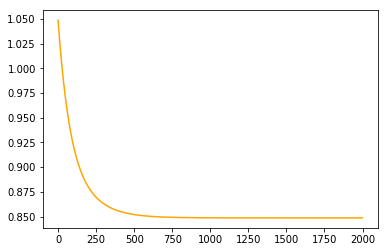

iteration 0: loss 0.904558
iteration 50: loss 0.854169
iteration 100: loss 0.824615
iteration 150: loss 0.806522
iteration 200: loss 0.795053
iteration 250: loss 0.787582
iteration 300: loss 0.782610
iteration 350: loss 0.779246
iteration 400: loss 0.776939
iteration 450: loss 0.775339
iteration 500: loss 0.774220
iteration 550: loss 0.773430
iteration 600: loss 0.772870
iteration 650: loss 0.772471
iteration 700: loss 0.772184
iteration 750: loss 0.771978
iteration 800: loss 0.771828
iteration 850: loss 0.771720
iteration 900: loss 0.771641
iteration 950: loss 0.771584
iteration 1000: loss 0.771542
iteration 1050: loss 0.771512
iteration 1100: loss 0.771489
iteration 1150: loss 0.771473
iteration 1200: loss 0.771461
iteration 1250: loss 0.771452
iteration 1300: loss 0.771445
iteration 1350: loss 0.771440
iteration 1400: loss 0.771437
iteration 1450: loss 0.771434
iteration 1500: loss 0.771432
iteration 1550: loss 0.771431
iteration 1600: loss 0.771430
iteration 1650: loss 0.771429
ite

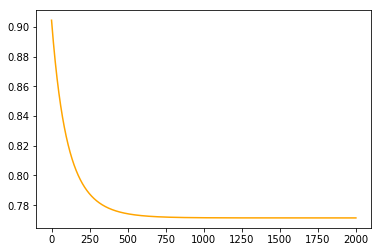

[0.24666666666666667, 0.25666666666666665]
iteration 0: loss 0.989540
iteration 50: loss 0.979385
iteration 100: loss 0.969742
iteration 150: loss 0.960580
iteration 200: loss 0.951874
iteration 250: loss 0.943597
iteration 300: loss 0.935724
iteration 350: loss 0.928233
iteration 400: loss 0.921102
iteration 450: loss 0.914312
iteration 500: loss 0.907843
iteration 550: loss 0.901678
iteration 600: loss 0.895800
iteration 650: loss 0.890194
iteration 700: loss 0.884845
iteration 750: loss 0.879740
iteration 800: loss 0.874864
iteration 850: loss 0.870208
iteration 900: loss 0.865758
iteration 950: loss 0.861506
iteration 1000: loss 0.857439
iteration 1050: loss 0.853550
iteration 1100: loss 0.849828
iteration 1150: loss 0.846267
iteration 1200: loss 0.842858
iteration 1250: loss 0.839593
iteration 1300: loss 0.836466
iteration 1350: loss 0.833469
iteration 1400: loss 0.830598
iteration 1450: loss 0.827846
iteration 1500: loss 0.825207
iteration 1550: loss 0.822676
iteration 1600: loss

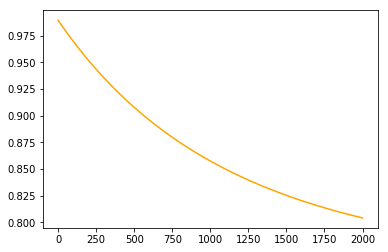

iteration 0: loss 0.927943
iteration 50: loss 0.924752
iteration 100: loss 0.921708
iteration 150: loss 0.918804
iteration 200: loss 0.916033
iteration 250: loss 0.913387
iteration 300: loss 0.910860
iteration 350: loss 0.908445
iteration 400: loss 0.906136
iteration 450: loss 0.903929
iteration 500: loss 0.901818
iteration 550: loss 0.899797
iteration 600: loss 0.897863
iteration 650: loss 0.896010
iteration 700: loss 0.894236
iteration 750: loss 0.892535
iteration 800: loss 0.890905
iteration 850: loss 0.889342
iteration 900: loss 0.887843
iteration 950: loss 0.886405
iteration 1000: loss 0.885024
iteration 1050: loss 0.883699
iteration 1100: loss 0.882426
iteration 1150: loss 0.881204
iteration 1200: loss 0.880030
iteration 1250: loss 0.878901
iteration 1300: loss 0.877816
iteration 1350: loss 0.876773
iteration 1400: loss 0.875770
iteration 1450: loss 0.874805
iteration 1500: loss 0.873876
iteration 1550: loss 0.872983
iteration 1600: loss 0.872123
iteration 1650: loss 0.871295
ite

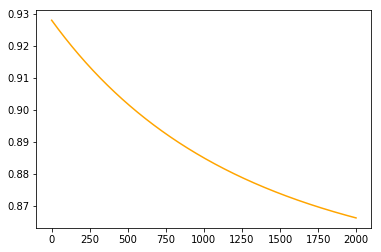

iteration 0: loss 0.853917
iteration 50: loss 0.850300
iteration 100: loss 0.846854
iteration 150: loss 0.843570
iteration 200: loss 0.840442
iteration 250: loss 0.837461
iteration 300: loss 0.834619
iteration 350: loss 0.831911
iteration 400: loss 0.829329
iteration 450: loss 0.826867
iteration 500: loss 0.824519
iteration 550: loss 0.822279
iteration 600: loss 0.820143
iteration 650: loss 0.818104
iteration 700: loss 0.816159
iteration 750: loss 0.814302
iteration 800: loss 0.812530
iteration 850: loss 0.810837
iteration 900: loss 0.809221
iteration 950: loss 0.807677
iteration 1000: loss 0.806203
iteration 1050: loss 0.804793
iteration 1100: loss 0.803447
iteration 1150: loss 0.802159
iteration 1200: loss 0.800929
iteration 1250: loss 0.799752
iteration 1300: loss 0.798626
iteration 1350: loss 0.797549
iteration 1400: loss 0.796519
iteration 1450: loss 0.795533
iteration 1500: loss 0.794590
iteration 1550: loss 0.793686
iteration 1600: loss 0.792822
iteration 1650: loss 0.791993
ite

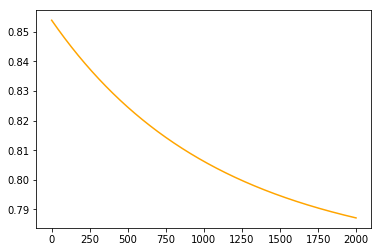

[0.24666666666666667, 0.25666666666666665, 0.40999999999999998]
iteration 0: loss 0.846284
iteration 50: loss 0.799511
iteration 100: loss 0.766499
iteration 150: loss 0.742218
iteration 200: loss 0.723821
iteration 250: loss 0.709566
iteration 300: loss 0.698321
iteration 350: loss 0.689320
iteration 400: loss 0.682024
iteration 450: loss 0.676043
iteration 500: loss 0.671092
iteration 550: loss 0.666956
iteration 600: loss 0.663473
iteration 650: loss 0.660517
iteration 700: loss 0.657991
iteration 750: loss 0.655820
iteration 800: loss 0.653941
iteration 850: loss 0.652307
iteration 900: loss 0.650880
iteration 950: loss 0.649626
iteration 1000: loss 0.648521
iteration 1050: loss 0.647543
iteration 1100: loss 0.646674
iteration 1150: loss 0.645900
iteration 1200: loss 0.645208
iteration 1250: loss 0.644588
iteration 1300: loss 0.644031
iteration 1350: loss 0.643530
iteration 1400: loss 0.643077
iteration 1450: loss 0.642668
iteration 1500: loss 0.642298
iteration 1550: loss 0.641962

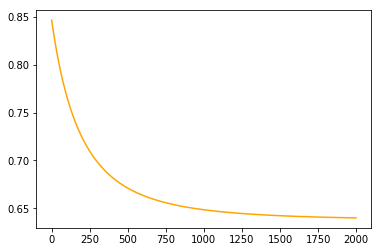

iteration 0: loss 1.122014
iteration 50: loss 1.022075
iteration 100: loss 0.953348
iteration 150: loss 0.907018
iteration 200: loss 0.875772
iteration 250: loss 0.854353
iteration 300: loss 0.839270
iteration 350: loss 0.828288
iteration 400: loss 0.820007
iteration 450: loss 0.813553
iteration 500: loss 0.808378
iteration 550: loss 0.804133
iteration 600: loss 0.800590
iteration 650: loss 0.797596
iteration 700: loss 0.795046
iteration 750: loss 0.792862
iteration 800: loss 0.790985
iteration 850: loss 0.789371
iteration 900: loss 0.787981
iteration 950: loss 0.786787
iteration 1000: loss 0.785760
iteration 1050: loss 0.784879
iteration 1100: loss 0.784125
iteration 1150: loss 0.783481
iteration 1200: loss 0.782931
iteration 1250: loss 0.782463
iteration 1300: loss 0.782065
iteration 1350: loss 0.781728
iteration 1400: loss 0.781442
iteration 1450: loss 0.781201
iteration 1500: loss 0.780998
iteration 1550: loss 0.780826
iteration 1600: loss 0.780682
iteration 1650: loss 0.780561
ite

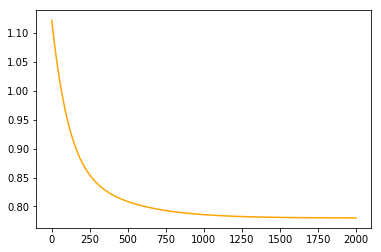

iteration 0: loss 0.833736
iteration 50: loss 0.788674
iteration 100: loss 0.757767
iteration 150: loss 0.735837
iteration 200: loss 0.719799
iteration 250: loss 0.707754
iteration 300: loss 0.698502
iteration 350: loss 0.691256
iteration 400: loss 0.685491
iteration 450: loss 0.680840
iteration 500: loss 0.677044
iteration 550: loss 0.673914
iteration 600: loss 0.671311
iteration 650: loss 0.669128
iteration 700: loss 0.667285
iteration 750: loss 0.665719
iteration 800: loss 0.664380
iteration 850: loss 0.663230
iteration 900: loss 0.662236
iteration 950: loss 0.661373
iteration 1000: loss 0.660622
iteration 1050: loss 0.659964
iteration 1100: loss 0.659387
iteration 1150: loss 0.658879
iteration 1200: loss 0.658429
iteration 1250: loss 0.658031
iteration 1300: loss 0.657677
iteration 1350: loss 0.657362
iteration 1400: loss 0.657080
iteration 1450: loss 0.656829
iteration 1500: loss 0.656603
iteration 1550: loss 0.656400
iteration 1600: loss 0.656218
iteration 1650: loss 0.656053
ite

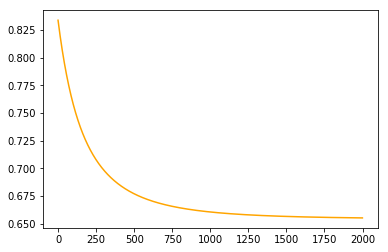

[0.24666666666666667, 0.25666666666666665, 0.40999999999999998, 0.24666666666666667]
iteration 0: loss 1.037274
iteration 50: loss 0.695687
iteration 100: loss 0.663608
iteration 150: loss 0.658733
iteration 200: loss 0.657660
iteration 250: loss 0.657341
iteration 300: loss 0.657230
iteration 350: loss 0.657190
iteration 400: loss 0.657175
iteration 450: loss 0.657169
iteration 500: loss 0.657167
iteration 550: loss 0.657166
iteration 600: loss 0.657165
iteration 650: loss 0.657165
iteration 700: loss 0.657165
iteration 750: loss 0.657165
iteration 800: loss 0.657165
iteration 850: loss 0.657165
iteration 900: loss 0.657165
iteration 950: loss 0.657165
iteration 1000: loss 0.657165
iteration 1050: loss 0.657165
iteration 1100: loss 0.657165
iteration 1150: loss 0.657165
iteration 1200: loss 0.657165
iteration 1250: loss 0.657165
iteration 1300: loss 0.657165
iteration 1350: loss 0.657165
iteration 1400: loss 0.657165
iteration 1450: loss 0.657165
iteration 1500: loss 0.657165
iteratio

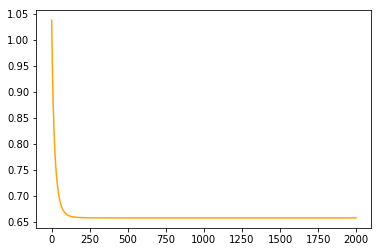

iteration 0: loss 1.147666
iteration 50: loss 0.814899
iteration 100: loss 0.793114
iteration 150: loss 0.789301
iteration 200: loss 0.788740
iteration 250: loss 0.788667
iteration 300: loss 0.788657
iteration 350: loss 0.788656
iteration 400: loss 0.788656
iteration 450: loss 0.788656
iteration 500: loss 0.788656
iteration 550: loss 0.788656
iteration 600: loss 0.788656
iteration 650: loss 0.788656
iteration 700: loss 0.788656
iteration 750: loss 0.788656
iteration 800: loss 0.788656
iteration 850: loss 0.788656
iteration 900: loss 0.788656
iteration 950: loss 0.788656
iteration 1000: loss 0.788656
iteration 1050: loss 0.788656
iteration 1100: loss 0.788656
iteration 1150: loss 0.788656
iteration 1200: loss 0.788656
iteration 1250: loss 0.788656
iteration 1300: loss 0.788656
iteration 1350: loss 0.788656
iteration 1400: loss 0.788656
iteration 1450: loss 0.788656
iteration 1500: loss 0.788656
iteration 1550: loss 0.788656
iteration 1600: loss 0.788656
iteration 1650: loss 0.788656
ite

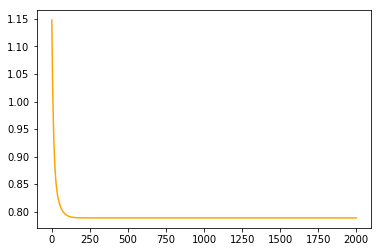

iteration 0: loss 0.850969
iteration 50: loss 0.689529
iteration 100: loss 0.675915
iteration 150: loss 0.673165
iteration 200: loss 0.672423
iteration 250: loss 0.672196
iteration 300: loss 0.672123
iteration 350: loss 0.672098
iteration 400: loss 0.672090
iteration 450: loss 0.672087
iteration 500: loss 0.672086
iteration 550: loss 0.672085
iteration 600: loss 0.672085
iteration 650: loss 0.672085
iteration 700: loss 0.672085
iteration 750: loss 0.672085
iteration 800: loss 0.672085
iteration 850: loss 0.672085
iteration 900: loss 0.672085
iteration 950: loss 0.672085
iteration 1000: loss 0.672085
iteration 1050: loss 0.672085
iteration 1100: loss 0.672085
iteration 1150: loss 0.672085
iteration 1200: loss 0.672085
iteration 1250: loss 0.672085
iteration 1300: loss 0.672085
iteration 1350: loss 0.672085
iteration 1400: loss 0.672085
iteration 1450: loss 0.672085
iteration 1500: loss 0.672085
iteration 1550: loss 0.672085
iteration 1600: loss 0.672085
iteration 1650: loss 0.672085
ite

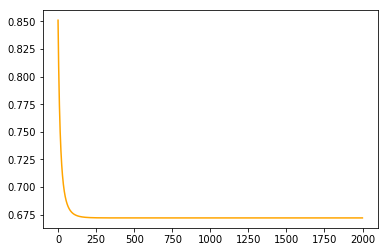

[0.24666666666666667, 0.25666666666666665, 0.40999999999999998, 0.24666666666666667, 0.24000000000000002]


In [318]:
# trying different values of parameters using CV 

stepsize=[1e-1,1e-1,1e-2,1e-1,1e-0]
reg_v = [1e-3,1e-2,1e-2,1e-4,1e-3]

Avg_validation_accuracy=[]
for item in range(5):
    reg= reg_v[item]
    step_size=stepsize[item]
     
    validation_accuracy=[]
    
    kfold = KFold(3)
    
    for k,(train,test) in enumerate(kfold.split(X,y)):
        W = W_cv
        b = b_cv
        num_examples=X[train].shape[0]
        w,b,accuracy=grad_desc_new(X[train],y[train],W,b,reg,num_examples,step_size,X[test],y[test])
        validation_accuracy.append(accuracy)
        #print('done processing for k: %d' % k)
    Avg_validation_accuracy.append(np.mean(validation_accuracy))
    print(Avg_validation_accuracy)
    #print('done processing for item: %d' % item)
    W = np.zeros(D,K)
    b = np.zeros(1,K)
        
    

(240, 2)
